In [1]:
from GeneticAlg import GenProg
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
var = [['Y_OfExp', 'Payment'], 
[1.4000000000000001, 46206.0],
[1.6, 37732.0],
[2.1, 43526.0],
[2.3000000000000003, 39892.0],
[3.0, 56643.0],
[3.1, 60151.0],
[3.3000000000000003, 54446.0],
[3.3000000000000003, 64446.0],
[3.8000000000000003, 57190.0],
[4.0, 63219.0],
[4.1, 55795.0],
[4.1, 56958.0],
[4.199999999999999, 57082.0],
[4.6, 61112.0],
[5.0, 67939.0],
[5.199999999999999, 66030.0],
[5.3999999999999995, 83089.0],
[6.0, 81364.0],
[6.1, 93941.0],
[6.8999999999999995, 91739.0],
[7.199999999999999, 98274.0],
[8.0, 101303.0],
[8.299999999999999, 113813.0],
[8.799999999999999, 109432.0],
[9.1, 105583.0],
[9.6, 116970.0],
[9.7, 112636.0],
[10.4, 122392.0],
[10.6, 121873.0]]
maxPay = max([n[1] for n in var[1:]])
for i in range(1, len(var)):
    var[i][1] = var[i][1]/maxPay

In [3]:
genP = GenProg(test=var, variables=var[0][:-1], populationSize=100, treeDepth=4, elitism=3, mutationChance=0.2, epochs=500, error=1e-3)
_ = genP.findSolution()

0 : 2.1880000531382393e-06 s
100 : 3.6096993579999435 s
200 : 7.81025511200005 s
300 : 11.846735147000118 s
400 : 15.807202749999988 s
elapse time :  19.888636 s 
solution: ((((Y_OfExp + 0.24640642005203517) - 0.5997075501757004) ** 0.5997075501757004) * 0.24640642005203517) 
fitness: 0.0029043376014295783


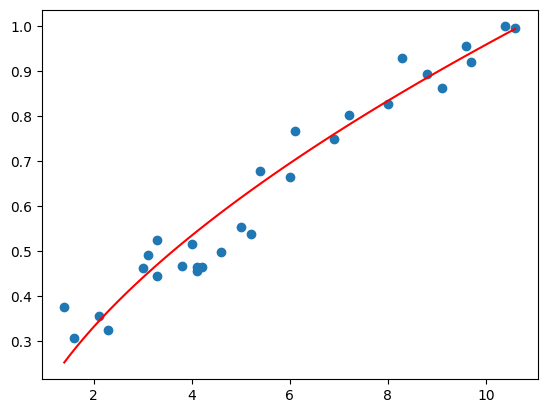

In [4]:
varX = [v[0] for v in var[1:]]
varY = [v[1] for v in var[1:]]

axisX = [['Y_OfExp']]
for n in np.linspace(min(varX), max(varX), 100):
    axisX.append([n])

bestGeneValues = [n[-1] for n in genP.bestFit.gene.valueCalcVar(axisX)[1:]]


plt.scatter(varX, varY)
plt.plot(axisX[1:], bestGeneValues, c = 'red')

plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [6]:
data = pd.read_csv('data.csv')
numeric_cols = ['Volume', 'Weight', 'CO2']
data[numeric_cols] = MinMaxScaler().fit_transform(data[numeric_cols])
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,0.0625,0.000000,0.300000
1,Mitsubishi,Space Star,0.1875,0.387029,0.166667
2,Skoda,Citigo,0.0625,0.145397,0.166667
3,Fiat,500,0.0000,0.078452,0.000000
4,Mini,Cooper,0.3750,0.366109,0.500000


In [7]:
varData = [['Volume', 'Weight', 'Co2Emmision']]

for i in range(len(data)):
    varData.append([data['Volume'][i], data['Weight'][i], data['CO2'][i]])

In [8]:
carsGenP = GenProg(test=varData, variables=varData[0][:-1], populationSize=100, treeDepth=3, elitism=5, mutationChance=0.2, epochs=500, error=1e-3)
_ = carsGenP.findSolution()

0 : 5.854999926668825e-06 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: divide by zero encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: invalid value encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: invalid value encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:61: RuntimeWarning: invalid value encountered in scalar multiply
  '*' : lambda x, y: (x) * (y),


100 : 5.808758708999903 s
200 : 10.880243463999932 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/genome.py:152: RuntimeWarning: overflow encountered in scalar power
  self.geneError += (values[i][-1] - self.test[i][-1])**2
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: overflow encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)


300 : 16.35245209499999 s
400 : 21.934930082999927 s
elapse time :  27.636991 s 
solution: ((Weight * (0.14507349465436836 ** (0.9321758396829414 - Volume))) + 0.14507349465436836) 
fitness: 0.029889009949658343


In [9]:
# xCars = [v[0] for v in varData[1:]]
# yCars = [v[1] for v in varData[1:]]

# Xosa = [['Weight']]
# for n in np.linspace(min(xCars), max(xCars), 100):
#     Xosa.append([n])

# carPredictions = [n[-1] for n in carsGenP.bestFit.gene.valueCalcVar(Xosa)[1:]]

# plt.scatter(xCars, yCars)
# plt.plot(Xosa[1:], carPredictions, c = 'red')

# plt.show()